# Simulation Methods Exam 2023
## YOU Borachhun, KHENG Piseth

In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

## Question 3

In [2]:
def sample_exponential(lmda):
    def inv_cdf_expo(x):
        return -np.log(1-x) / lmda

    U = np.random.rand()
    return inv_cdf_expo(U)

# Exercise 2

## Question 4

In [3]:
def discrete_sample(support_list, proba_list):

    # c_list[k] = proba_list[0] + ... + proba_list[k]
    c_list = []
    for i in range(len(proba_list)):
        c_list.append(sum(proba_list[0:(i+1)]))

    k = 0
    U = np.random.rand()
    while (U > c_list[k] and k < len(proba_list)):
        k += 1
    return support_list[k]

def X_sample():
    X_support_list = [-5, -7, 2, 6]
    X_proba_list = [1/4, 1/4, 1/8, 3/8]

    return discrete_sample(X_support_list, X_proba_list)
    

## Question 5

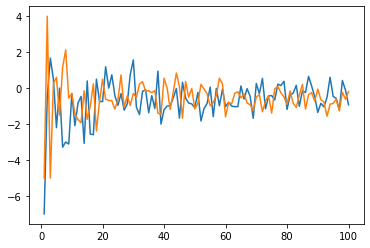

In [4]:
def Y_sample():
    Y_support_list = [-5, -7, 2, 6]
    Y_proba_list = [3/8, 3/104, 1/2, 5/52]

    return discrete_sample(Y_support_list, Y_proba_list)

def question5():
    X_bar_list = []
    Y_bar_list = []

    for n in range(1,100+1):
        X_list = [X_sample() for _ in range(n)]
        Y_list = [Y_sample() for _ in range(n)]

        X_bar = sum(X_list) / n
        Y_bar = sum(Y_list) / n

        X_bar_list.append(X_bar)
        Y_bar_list.append(Y_bar)
    
    plt.plot([n for n in range(1,100+1)], X_bar_list)
    plt.plot([n for n in range(1,100+1)], Y_bar_list)

question5()

## Question 6

In [5]:
# (a)

def Zn_sample(N):

    # Values obtained from previous questions
    mu_X = -1/2
    sigma_X = np.sqrt(129/4)

    n = 40
    Zn_list = []

    for i in range(1,N+1):
        X_list = [X_sample() for _ in range(n)]
        X_bar = sum(X_list) / n

        Zn = np.sqrt(n) * (X_bar - mu_X) / sigma_X
        Zn_list.append(Zn)
    
    return Zn_list

def Tn_sample(N):

    # Values obtained from previous questions
    mu_Y = -1/2
    sigma_Y = np.sqrt(16)

    n = 40
    Tn_list = []

    for i in range(1,N+1):
        Y_list = [Y_sample() for _ in range(n)]
        Y_bar = sum(Y_list) / n

        Tn = np.sqrt(n) * (Y_bar - mu_Y) / sigma_Y
        Tn_list.append(Tn)
    
    return Tn_list

print(Zn_sample(N=10))
print(Tn_sample(N=10))

[-1.2807459066963203, 1.2807459066963203, 0.13921151159742615, 2.0046457670029363, 0.02784230231948525, -2.422280301795215, 0.6125306510286751, -0.9187959765430124, -1.1972189997378648, -0.02784230231948525]
[-0.8696263565463045, 0.35575623676894264, -0.3162277660168379, 1.0277402395547235, 0.11858541225631425, 0.43481317827315225, -0.5533985905294664, -1.6601957715883993, 1.1463256518110376, 0.909154827298409]


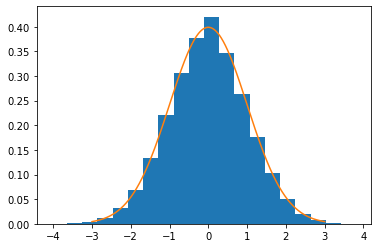

In [6]:
# (b)

def plot_Zn():

    N = 10**5
    def pdf_std_normal(x):
        return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)
    
    # Plot histogram of Zn
    plt.hist(Zn_sample(N), bins=20, density=True)

    # Plot standard normal curve
    X = np.linspace(-3,3,1000)
    plt.plot(X, list(map(pdf_std_normal, X)))

plot_Zn()

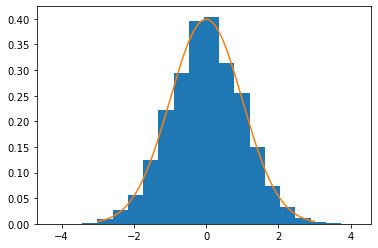

In [7]:
def plot_Tn():

    N = 10**5
    def pdf_std_normal(x):
        return 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)
    
    # Plot histogram of Tn
    plt.hist(Tn_sample(N), bins=20, density=True)

    # Plot standard normal curve
    X = np.linspace(-3,3,1000)
    plt.plot(X, list(map(pdf_std_normal, X)))

plot_Tn()

# Exercise 3

In [8]:
P = [[0.1, 0.1, 0.5, 0.2, 0.1],
     [0.1, 0.1, 0.1, 0.4, 0.3],
     [0.2, 0.1, 0.1, 0.5, 0.1],
     [0.1, 0.1, 0.1, 0.6, 0.1],
     [0.2, 0.2, 0.1, 0.4, 0.1]]
E = [1,2,3,4,5]

## Question 1

In [9]:
N = 100
X0 = 1

def sim_chain(E, P, X0, N):
    chain = [X0]
    for _ in range(N):
        previous_state = chain[-1]
        chain.append(
            discrete_sample(E, P[previous_state-1])
        )
    return chain

chain = sim_chain(E, P, X0, N)

for e in E:
    print(f"# of {e}: {sum([c==e for c in chain])}")

# of 1: 20
# of 2: 11
# of 3: 23
# of 4: 40
# of 5: 7


## Question 3

In [10]:
def piestim(P):
    import numpy as np

    # We transform P into format array 
    P = np.asarray(P)

    A = np.append(np.transpose(P)-np.identity(len(P)), [[1 for _ in range(len(P))]], axis=0)
    b0 = np.array([0 for i in range(len(P))])
    B = np.transpose(np.append(b0,1))

    Pi_emstime=np.linalg.solve(np.dot(np.transpose(A),A),  np.dot(np.transpose(A),B))

    return Pi_emstime

piestim(P)

array([0.12733844, 0.1122449 , 0.15093537, 0.48703231, 0.12244898])

## Question 4

In [11]:
h = []
N = 100000
X = sim_chain(E, P, X0, N)
for x in E:
    sum = 0
    for k in range(N):
        sum += int(X[k]==x)
    h.append(sum/N)
h

[0.12902, 0.11215, 0.15028, 0.4869, 0.12165]

## Question 5

In [12]:
#5
N = 100000
def P_estimate(X,size):
    Q = np.zeros((5,5))

    for i in E:
        numerateur = np.sum([int(X[k]==i) for k in range(size+1)])
        for j in E:
            dominateur = np.sum([int(X[k]==i and X[k+1]==j) for k in range(size)])
            Q[i-1][j-1] = dominateur/numerateur
    return Q

# Exercise 4

In [13]:
# Samples of normal distribution using rejection method
# (TP 1 Exercise 6)

# Return ONE sample uniformly from given support list
def one_sample_uniform(increased_support_list):
    k = 0
    U = np.random.rand()
    sum_proba = 1 / len(increased_support_list)
    while (U > sum_proba):
        k += 1
        sum_proba += 1 / len(increased_support_list)
    return increased_support_list[k]

# Return a list of N samples of absolute standard normal distribution
def sample_abs_std_normal(N):
    res = []

    def pdf_abs_std_normal(x): 
        return 2 / np.sqrt(2*np.pi) * np.exp(-x**2/2) * (1 if x>0 else 0)

    def g(x): 
        return np.exp(-x) * (1 if x>0 else 0)
    
    def inv_cdf_g(x):
        return -np.log(1-x) * (1 if x>0 and x<1 else 0)

    constant = np.sqrt(2 * np.e / np.pi)

    for _ in range(N):
        while True:
            U = np.random.rand()

            U_ = np.random.rand()
            Y = inv_cdf_g(U_)

            if U < pdf_abs_std_normal(Y) / (constant * g(Y)):
                break
        res.append(Y)
    
    return res

# Return a list of N samples of standard normal distribution
def sample_std_normal(N):
    res = []
    for i in sample_abs_std_normal(N):
        res.append(one_sample_uniform([-1,1]) * i)
    return res

# Return a list of N samples of normal distribution of parameters mu and sigma
def sample_normal(mu, sigma, N):
    res = []
    std_normal_list = sample_std_normal(N)
    for z in std_normal_list:
        res.append(z*sigma+mu)
    return res

## Question 3

In [14]:
def I_est(N):
    m0 = 0
    sigma = 2

    X_list = sample_normal(m0, sigma, N)

    def g(x):
        if x >= 9/2:
            return 2*np.sqrt(2*np.pi)*(x**2)
        else:
            return 0
    
    MC_est = 0
    for x in X_list:
        MC_est += g(x)
    MC_est /= N

    return MC_est

I_est(N=1000000)

1.7009522061247966

## Question 4

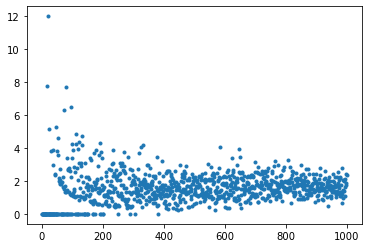

In [15]:
N_list = [i for i in range(1,1000+1)]

theta_hat_list = [I_est(N) for N in N_list]

plt.plot(N_list, theta_hat_list, marker='.', linestyle='None')

## Question 5

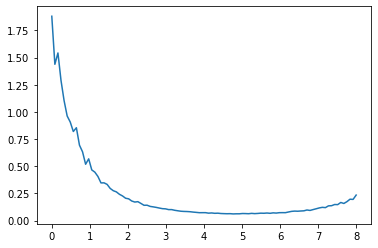

In [17]:
# (c)

def question5c():
    def g(x):
        if x >= 9/2:
            return 2*np.sqrt(2*np.pi)*(x**2)
        else:
            return 0
        
    def K(mu, sigma, eps):
        return g(mu + sigma*eps) * np.exp(-mu * (mu + 2*sigma*eps) / sigma**2)

    N = 10000
    sigma = 2
    mu_list = list(np.linspace(0,8,100))

    K_lists = []
    for mu in mu_list:
        eps_list = sample_std_normal(N)
        K_lists.append([])
        for i in range(N):
            # index -1 = empty list that was just appended before this loop
            K_lists[-1].append(K(mu, sigma, eps_list[i]))
    
    K_tilde_list = []
    for i in range(len(mu_list)):
        K_tilde_list.append(
            np.sum(K_lists[i]) / N
        )
    
    plt.plot(mu_list, K_tilde_list)

question5c()